## Redes Neuronais + Backpropagation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   sklearn.neural_network import MLPClassifier
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import accuracy_score

O dado a ser utilizado está anexado. Trata-se de 5000 entradas, onde cada entrada refere-se a um dígito escrito manualmente (i.e., MNIST dataset). Dessa forma, m=5000 e K=10. Cada entrada é dada por uma matriz de dimensões 28 por 28, ou seja, um vetor de 784 dimensões. A primeira coluna do arquivo sempre é o rótulo do dígito correto.

In [3]:
m = 5000

df = pd.read_csv('data_tp1', header=None)

x = np.asarray(np.matrix(df.loc[:,1:]))/255
y = np.asarray(np.array(df.loc[:,0]))

(X_train, X_test, Y_train, Y_test) = train_test_split(x, y)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(3750, 784) (1250, 784) (3750,) (1250,)


Você irá utilizar a função Sigmóide para obter não-linearidade. Além disso, a função de perda a ser minimizada é a seguinte:

onde m é a quantidade de entradas no treino, K é o número de saídas possíveis, yk(i) representa a saída correta de cada classe k em cada entrada (i), e similarmente (h0(x(i)))k representa a saída dada pela rede neuronal.

Neste trabalho você irá implementar uma rede neuronal com três camadas:

1. Camada de entrada: cada unidade representa uma dimensão do dado de entrada.

2. Camada oculta: cada unidade representa uma transformação a partir das unidades de entrada.

3. Camada de saída: cada unidade representa a chance da saída correspondente ser a correta.

A rede neuronal a ser implementada deverá ter 784 unidades de entrada e 10 unidades de saída. Em seus experimentos, você deverá variar o número de unidades na camada oculta (25, 50, 100).

Além disso, você deverá comparar os seguintes algoritmos de cálculo de gradiente:

1. Gradient Descent: o gradiente é calculado após cada época (após as 5000 entradas serem processadas).

2. Stochastic Gradient Descent: o gradiente é calculado após cada entrada.

3. Mini-Batch: o gradiente é calculado após um certo número de entradas (considere 10 e 50).

Por fim, você também deverá variar a taxa de aprendizado: 0.5, 1, 10.

In [4]:
rn = []

for i in [1, 2, 3, 4]:
    for k in [25, 50, 100]:    
        for j in [0.5, 1, 10]:
            rn.append(MLPClassifier(activation='logistic', hidden_layer_sizes=(k), solver='sgd', learning_rate='constant', 
                                    learning_rate_init=j, batch_size=(m if i == 1 else 1 if i == 2 else 10 if i == 3 else 50), 
                                    random_state=1, verbose=0))

print(rn, len(rn))

[MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=25,
              learning_rate_init=0.5, random_state=1, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=25,
              learning_rate_init=1, random_state=1, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=25,
              learning_rate_init=10, random_state=1, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=50,
              learning_rate_init=0.5, random_state=1, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=50,
              learning_rate_init=1, random_state=1, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=5000, hidden_layer_sizes=50,
              learning_rate_init=10, random_state=1, solver='sgd', verbose=0), MLPClassifier(activation='logistic', batch_size=5000, hidden_la

In [6]:
# for model in rn:
#     model.fit(X_train, Y_train)
labelsG = ["Gradiente Descendente", "Gradiente Descendente Estocástico", "Mini-Batch 10", "Mini-Batch 50"]
labelsO = ["Camada Oculta: 25", "Camada Oculta: 50", "Camada Oculta: 100"]
labelsA = ["Aprendizado: 0.5", "Aprendizado: 1", "Aprendizado: 10"]

O documento a ser entregue deverá apresentar o resultado de seus experimentos. Ou seja, deverá apresentar discussão da variação do número de unidades na camada oculta para cada um dos três algoritmos de cálculo de gradiente. Você deverá apresentar gráficos mostrando a convergência do erro empírico para cada situação (unidades na camada oculta, algoritmo de cálculo do gradiente, taxa de aprendizado). Você deverá deixar claras todas as hipóteses que julgar serem pertinentes.

/home/junio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/home/junio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/junio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:605: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/home/junio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/junio/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py

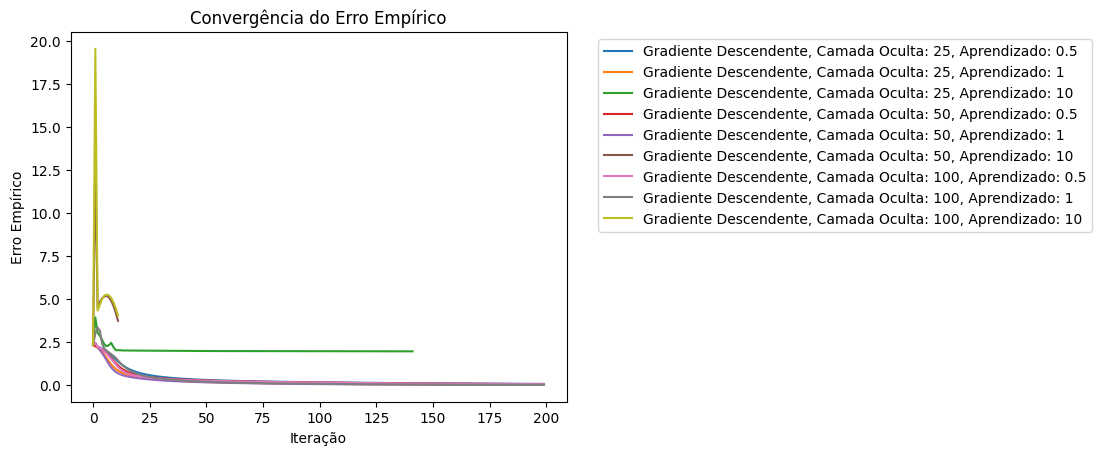

In [5]:
count = 0
plt.xlabel("Iteração")
plt.ylabel("Erro Empírico")
plt.title("Convergência do Erro Empírico")
for k in labelsO:
    for j in labelsA:
        rn[count].fit(X_train, Y_train)
        plt.plot(rn[count].loss_curve_, label="{0}, {1}, {2}".format(labelsG[0],k,j))
        count+=1
plt.legend(bbox_to_anchor = (1.05, 1))


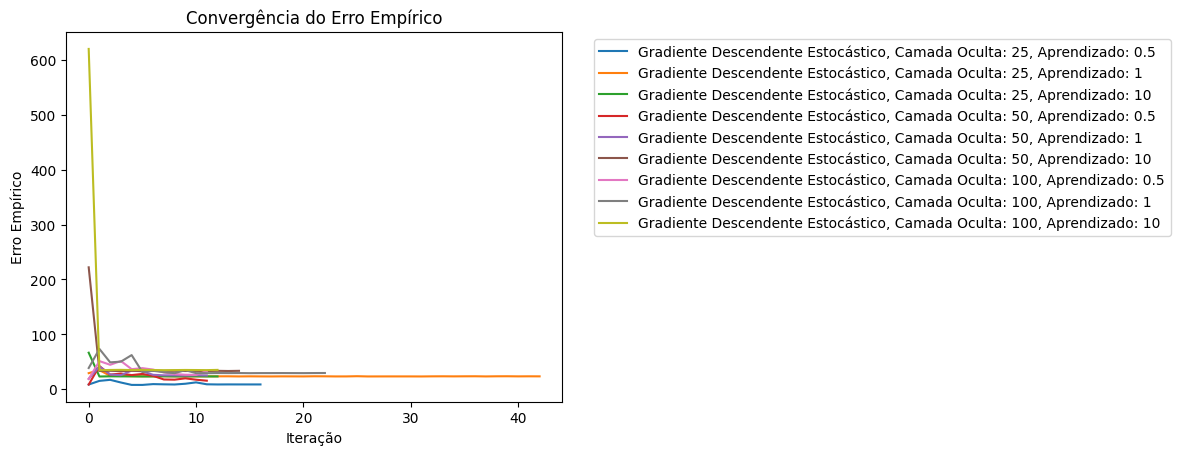

In [7]:
count = 9
plt.xlabel("Iteração")
plt.ylabel("Erro Empírico")
plt.title("Convergência do Erro Empírico")
for k in labelsO:
    for j in labelsA:
        rn[count].fit(X_train, Y_train)
        plt.plot(rn[count].loss_curve_, label="{0}, {1}, {2}".format(labelsG[1],k,j))
        count+=1
plt.legend(bbox_to_anchor = (1.05, 1))

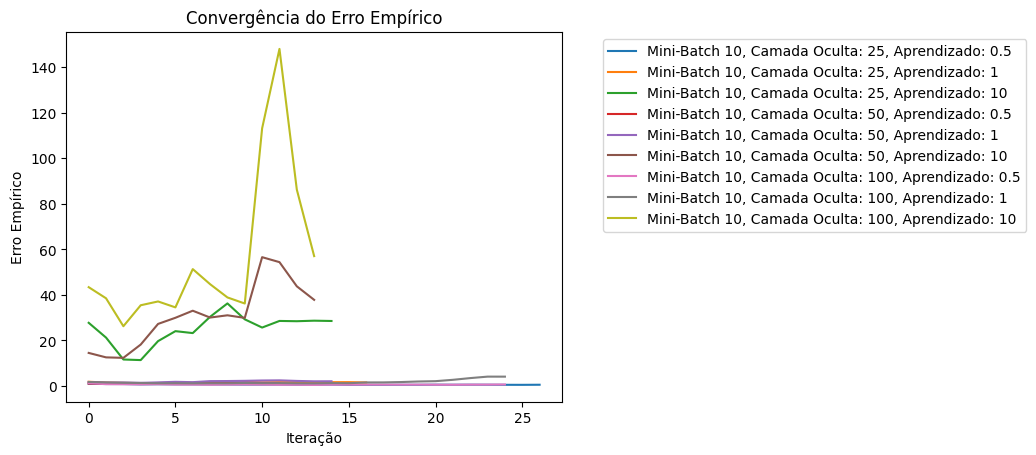

In [11]:
count = 18
plt.xlabel("Iteração")
plt.ylabel("Erro Empírico")
plt.title("Convergência do Erro Empírico")
for k in labelsO:
    for j in labelsA:
        rn[count].fit(X_train, Y_train)
        plt.plot(rn[count].loss_curve_, label="{0}, {1}, {2}".format(labelsG[2],k,j))
        count+=1
plt.legend(bbox_to_anchor = (1.95, 1))

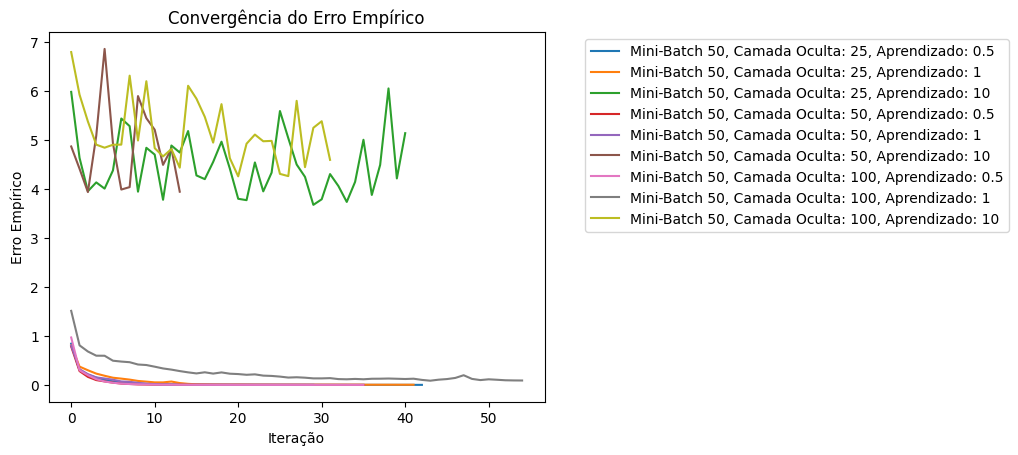

In [10]:
count = 27
plt.xlabel("Iteração")
plt.ylabel("Erro Empírico")
plt.title("Convergência do Erro Empírico")
for k in labelsO:
    for j in labelsA:
        rn[count].fit(X_train, Y_train)
        plt.plot(rn[count].loss_curve_, label="{0}, {1}, {2}".format(labelsG[3],k,j))
        count+=1
plt.legend(bbox_to_anchor = (1.95, 1))